<a href="https://colab.research.google.com/github/juanchess98/Notebooks-Deep-Learning/blob/regresion-logistica/Regresi%C3%B3n_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística




La regresión logística es un métdo de clasificación binaria, es decir, la variable dependiente sólo puede tomar dos valores: Verdadero ó Falso, 1 ó 0, etc. 

Se denimina regresión logística ya que el corazón del método es la llamada función logística o función sigmoide, la cual es de la forma:

\begin{equation}
  \sigma(z)=\frac{1}{1+e^{-z}}
\end{equation}

Se usa el método de regresión logística para modelar variables dependientes binarias en lugar de la regresión lineal ya que esta última para valores que se encuentran en los extremos de la recta predicha entrega valores menores a cero y mayores a uno, esto va en contra de la definición de probabilidades que están en el rango $[0, 1]$.

Es aquí donde difieren los dos métodos ya que la regresión logística utiliza la recta generada por la regresión lineal pero la pasa por la función sigmoide para que el resultado siempre esté entre 0 y 1. En otras palabras, el problema de regresión se convierte en un problema de clasificación.

Entonces dado un conjunto de datos, suponemos que podemos modelarlo con una expresión matemática de la forma:

\begin{equation}
y=wx+b
\end{equation}

Esta ecuación es una representación lineal de la relación que existe entre los datos de entrada $x$ (características) y la salida $y$. Donde $y$ se puede expresar de la forma:


\begin{equation}
\hat{y}^{(i)}=w_0+w_1x_1^{(i)}+w_2x_2^{(i)}+...+w_nx_n^{(i)}
\end{equation}

Para clasificación se necesita acotar este resultado a valores de $y$ entre $[0, 1]$ por lo que necesitamos pasar este resultado a través de la función de activación sigmoide:

 \begin{equation}
  \sigma(\hat y)=P(\hat{y}^{(i)}=1)=\frac{1}{1+e^{w_0+w_1x_1^{(i)}+w_2x_2^{(i)}+...+w_nx_n^{(i)}}}
\end{equation}

In [2]:
!pip install requests

In [46]:
import requests

url = 'https://github.com/juanchess98/Notebooks-Deep-Learning.git'

request = requests.get(url)

In [43]:
with open ('helpers.py', 'w') as helpers:
  helpers.write(request.text)

In [ ]:
!git clone https://github.com/juanchess98/Notebooks-Deep-Learning.git

In [40]:
import helpers

SyntaxError: ignored

Teoria


In [ ]:
#Representación grafica

In [ ]:
import keras

# Optimización

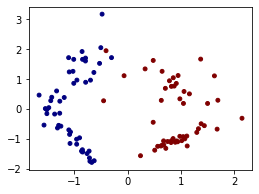

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
X_, y_ = datasets.make_classification(n_samples=100, n_features = 2, random_state=1, n_redundant=0)
fig = plt.figure(figsize=(4.0, 3.0))
ax = fig.add_subplot(111)

ax.scatter(X_[:,0],X_[:,1],s=15,c=y_.squeeze(),cmap='jet')


# Implementacion en Keras

In [ ]:
def reg_logistica(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):

    ## Implementación con Keras funcional
    dim = X_train.shape[1]
    inputs = Input(shape=(dim,))
    preds = Dense(1,activation='sigmoid')(inputs)
    model = Model(inputs=inputs,outputs=preds)
    sgd=keras.optimizers.SGD(lr = learning_rate)
    model.compile(optimizer=sgd ,loss='binary_crossentropy',metrics=['binary_accuracy'])
    model.fit(X_train,Y_train, batch_size=1, epochs=num_iterations, shuffle=False)
    return model

In [ ]:
def reg_logistica_2 (X_train, Y_train, X_test, Y_test, num_itera= 2000, learning_rate = 0.1):
  dim = X_train.shape[1]
  model = keras.Sequential()
  model.add(Input(dim, ))
  model.add(Dense(1), activation='sigmoid')
  optmizer = keras.optimizers.SGD(learning_rate=0.001)
  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics['binary_accuracy'])
  model.fit(X_train, Y_train, batch_size = 1, epochs = num_itera, shuffle = False)
  return model

Explicacion adicional

# Implementacion en Pytorch

In [ ]:
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X_, y_ = datasets.make_classification(n_samples=100, n_features = 6, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.2, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


n_samples, n_features = X_.shape

In [ ]:
class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

In [ ]:
model = LogisticRegression(n_features)

In [ ]:
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(params= model.parameters(),lr = learning_rate)

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  #backward
  loss.backward()

  ##update
  optimizer.step()

  optimizer.zero_grad() ## clean gradients to next iteration

  if(epoch+1) % 10 == 10:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

In [ ]:
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy =  {acc:.4f}')

accuracy =  0.3500


In [ ]:
#grafico

Explicación adicional